# 1. Import and install dependencies


In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib 


In [2]:
import cv2
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import time
import  mediapipe as mp

# 2. Keypoints using Mp holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
cv2.cvtColor??

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic. FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,11,10), thickness=2, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=1)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,11,76), thickness=2, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(121,42,550), thickness=2, circle_radius=1)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,115,66), thickness=2, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=1)
                             ) 

In [8]:
  mp_drawing.draw_landmarks??

In [9]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

      # Make detections
        image, results = mediapipe_detection(frame,holistic)
        print(results)
#         make landmarks
        draw_styled_landmarks(image, results)
#         show screen
        cv2.imshow('OpenCV Feed',image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
len(results.left_hand_landmarks.landmark)


21

In [11]:
draw_landmarks(frame, results)

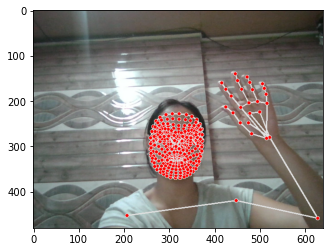

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3.extract keypoints values

In [13]:
len(results.pose_landmarks.landmark)

33

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten()  if results.right_hand_landmarks else np.zeros(21*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)


In [16]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [17]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [18]:
result_test = extract_keypoints(results)

In [19]:
result_test

array([ 0.4929603 ,  0.62513167, -0.89978969, ...,  0.        ,
        0.        ,  0.        ])

In [20]:
468*3+33*4+21*3+21*3

1662

In [21]:
np.save('0', result_test)

In [22]:
np.load('0.npy')

array([ 0.4929603 ,  0.62513167, -0.89978969, ...,  0.        ,
        0.        ,  0.        ])


# 4.setup folders for collection

In [23]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [24]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [25]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5.collect keypoints values for training and testing

In [26]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [27]:
cap.release()
cv2.destroyAllWindows()

# 6.preprocess data and create labels and features

In [28]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [29]:
label_map = {label:num for num, label in enumerate(actions)}

In [30]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [31]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [32]:
np.array(sequences).shape

(90, 30, 1662)

In [33]:
np.array(labels).shape

(90,)

In [34]:
X = np.array(sequences)

In [35]:
X.shape

(90, 30, 1662)

In [36]:
y = to_categorical(labels).astype(int)

In [37]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [39]:
y_test.shape

(5, 3)

# 7.Build and train LSTM neutral network

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [41]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [55]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [43]:
res = [.7, 0.2, 0.1]

In [44]:
actions[np.argmax(res)]

'hello'

In [56]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [46]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 9s 629ms/step - loss: 3.6112 - categorical_accuracy: 0.3561
Epoch 2/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.4140 - categorical_accuracy: 0.3796
Epoch 3/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.1004 - categorical_accuracy: 0.3816
Epoch 4/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.1011 - categorical_accuracy: 0.2603
Epoch 5/2000
3/3 [==============================] - 0s 130ms/step - loss: 1.9795 - categorical_accuracy: 0.3855
Epoch 6/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.6695 - categorical_accuracy: 0.2759
Epoch 7/2000
3/3 [==============================] - 0s 114ms/step - loss: 5.0182 - categorical_accuracy: 0.3679
Epoch 8/2000
3/3 [==============================] - 0s 130ms/step - loss: 2.0473 - categorical_accuracy: 0.3738
Epoch 9/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.1323 - categorical_accuracy:

3/3 [==============================] - 0s 114ms/step - loss: 0.4789 - categorical_accuracy: 0.8043
Epoch 74/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.4725 - categorical_accuracy: 0.7788
Epoch 75/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.5180 - categorical_accuracy: 0.7632
Epoch 76/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.7668 - categorical_accuracy: 0.6477
Epoch 77/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.5691 - categorical_accuracy: 0.7494
Epoch 78/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.5473 - categorical_accuracy: 0.7123
Epoch 79/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.5237 - categorical_accuracy: 0.7554
Epoch 80/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.3976 - categorical_accuracy: 0.5694
Epoch 81/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.3670 - categorical_accuracy: 0.34

KeyboardInterrupt: 

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [48]:
res = model.predict(X_test)

In [50]:
actions[np.argmax(res[4])]

'hello'

In [51]:
actions[np.argmax(y_test[4])]

'thanks'

# 9.save weights

In [52]:
 model.save('action.h5')

In [53]:
del model

In [57]:
model.load_weights('action.h5')

# 10.Save evaluation using confusion matrix and accuracy

In [58]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [81]:
yhat = model.predict(X_test)

In [82]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [83]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 4],
        [0, 1]],

       [[3, 0],
        [2, 0]],

       [[3, 0],
        [2, 0]]], dtype=int64)

In [84]:
accuracy_score(ytrue, yhat)

0.2

# 11.test in real time

In [85]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

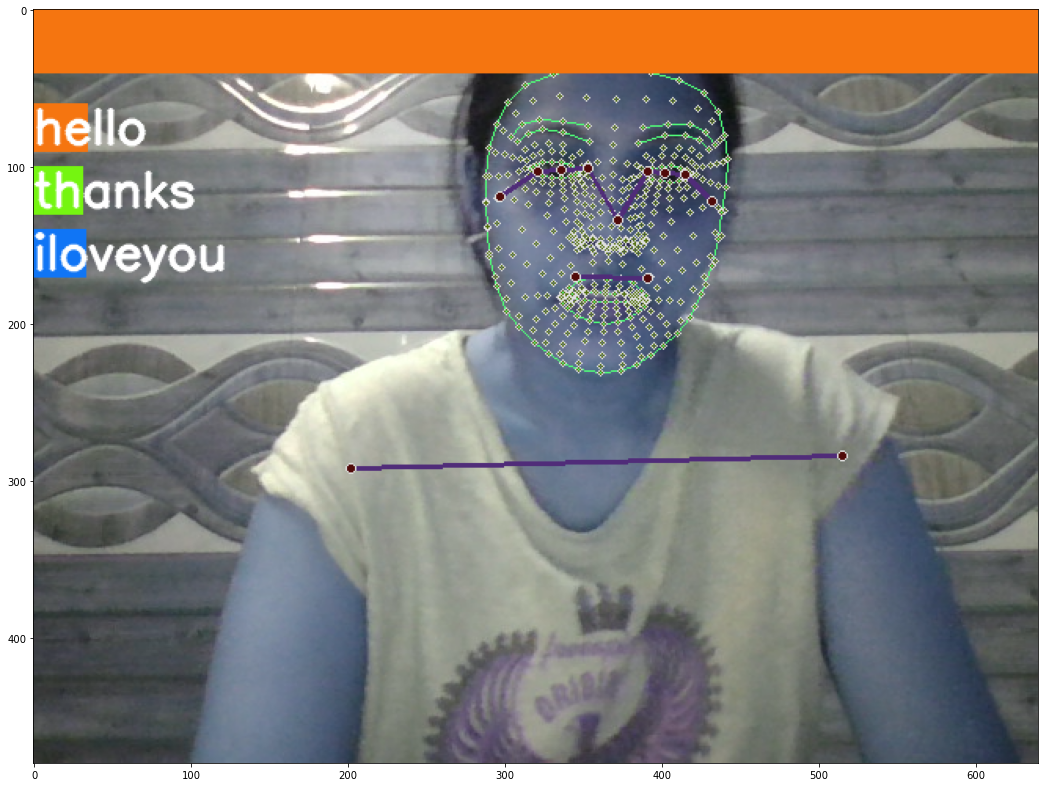

In [86]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))


In [88]:
sequence.reverse()

In [89]:
len(sequence)

30

In [90]:
sequence.append('def')

In [91]:
sequence.reverse()

In [92]:
sequence[-30:]

[array([ 0.55859643,  0.62445682, -1.3880204 , ...,  0.23328954,
         0.39832267, -0.01923585]),
 array([ 0.55829072,  0.62558275, -1.47658944, ...,  0.24139884,
         0.39237452, -0.02780127]),
 array([ 0.55811536,  0.62622011, -1.4506216 , ...,  0.24433812,
         0.39335907, -0.02506414]),
 array([ 0.55996352,  0.62635493, -1.28042448, ...,  0.36508647,
         0.48240328, -0.0104722 ]),
 array([ 0.56363726,  0.62523168, -1.20962489, ...,  0.3387748 ,
         0.40665552, -0.01054275]),
 array([ 0.56354648,  0.62668556, -1.34159255, ...,  0.23191229,
         0.41944873,  0.02538742]),
 array([ 0.56329167,  0.62595904, -1.41369832, ...,  0.2220985 ,
         0.3989827 , -0.00172853]),
 array([ 0.56354588,  0.62622851, -1.37476468, ...,  0.23299149,
         0.39756694, -0.01375535]),
 array([ 0.56342328,  0.62855881, -1.27144957, ...,  0.30926582,
         0.50971431, -0.01242603]),
 array([ 0.56072146,  0.62822324, -1.47521627, ...,  0.20725793,
         0.4161756 , -0.00

In [106]:
# 1. New detection variables
sequence = []
sentence = []
predictions= []
threshold = 0.3

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [107]:
cap.release()
cv2.destroyAllWindows()

In [108]:
res[np.argmax(res)] > threshold

True

In [109]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[0.34587243, 0.3212643 , 0.33286324]], dtype=float32)